# CatBoost 

O CatBoost é um algoritmo de classificação que se destaca pela sua capacidade de lidar com dados categóricos, fornecendo resultados precisos e eficientes em treinamento. Com recursos avançados de tratamento de dados e prevenção de sobreajuste, o CatBoost é uma escolha popular em diversas aplicações, desde análise de fraudes até sistemas de recomendação.







In [54]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     --------                                61.4/293.3 kB 1.7 MB/s eta 0:00:01
     ---------------                        122.9/293.3 kB 1.4 MB/s eta 0:00:01
     ---------------------------------      256.0/293.3 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install catboost

### Importando bibliotecas

In [56]:
import catboost
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [57]:
# Lendo os dados
df = pd.read_csv('../output/word2vec_corpus.csv')

In [58]:
# Separando os dados em features e target
X = df.drop(['Frase', 'sentimento'], axis=1)
y = df['sentimento']

In [59]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
# Treinando o modelo
model = CatBoostClassifier(iterations=200, learning_rate=0.1)
model.fit(X_train, y_train)

0:	learn: 1.0642903	total: 16.9ms	remaining: 3.36s
1:	learn: 1.0337870	total: 32ms	remaining: 3.16s
2:	learn: 1.0106335	total: 47.3ms	remaining: 3.11s
3:	learn: 0.9919775	total: 61.2ms	remaining: 3s
4:	learn: 0.9755912	total: 76.5ms	remaining: 2.98s
5:	learn: 0.9612318	total: 92.5ms	remaining: 2.99s
6:	learn: 0.9483887	total: 109ms	remaining: 3s
7:	learn: 0.9358186	total: 127ms	remaining: 3.05s
8:	learn: 0.9243692	total: 142ms	remaining: 3.01s
9:	learn: 0.9138657	total: 156ms	remaining: 2.96s
10:	learn: 0.9058804	total: 170ms	remaining: 2.93s
11:	learn: 0.8982543	total: 185ms	remaining: 2.9s
12:	learn: 0.8906803	total: 199ms	remaining: 2.87s
13:	learn: 0.8851217	total: 215ms	remaining: 2.86s
14:	learn: 0.8789031	total: 231ms	remaining: 2.85s
15:	learn: 0.8728067	total: 248ms	remaining: 2.85s
16:	learn: 0.8672991	total: 262ms	remaining: 2.83s
17:	learn: 0.8621714	total: 276ms	remaining: 2.79s
18:	learn: 0.8573972	total: 290ms	remaining: 2.77s
19:	learn: 0.8539986	total: 305ms	remaining:

162:	learn: 0.6223503	total: 2.93s	remaining: 664ms
163:	learn: 0.6213103	total: 2.94s	remaining: 647ms
164:	learn: 0.6204349	total: 2.96s	remaining: 628ms
165:	learn: 0.6199556	total: 2.98s	remaining: 610ms
166:	learn: 0.6186719	total: 3s	remaining: 593ms
167:	learn: 0.6173450	total: 3.02s	remaining: 575ms
168:	learn: 0.6164710	total: 3.04s	remaining: 558ms
169:	learn: 0.6154512	total: 3.06s	remaining: 541ms
170:	learn: 0.6147371	total: 3.08s	remaining: 523ms
171:	learn: 0.6136110	total: 3.1s	remaining: 505ms
172:	learn: 0.6128778	total: 3.12s	remaining: 487ms
173:	learn: 0.6114708	total: 3.14s	remaining: 469ms
174:	learn: 0.6103416	total: 3.16s	remaining: 451ms
175:	learn: 0.6091037	total: 3.17s	remaining: 433ms
176:	learn: 0.6079218	total: 3.19s	remaining: 415ms
177:	learn: 0.6068792	total: 3.21s	remaining: 397ms
178:	learn: 0.6060208	total: 3.23s	remaining: 379ms
179:	learn: 0.6047524	total: 3.24s	remaining: 360ms
180:	learn: 0.6037970	total: 3.26s	remaining: 342ms
181:	learn: 0.60

In [61]:
# Avaliando o modelo no conjunto de teste
accuracy = model.score(X_test, y_test)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.61


In [62]:
from sklearn.metrics import recall_score

# Predizendo as classes no conjunto de teste
y_pred = model.predict(X_test)

# Calculando o recall usando a média macro
recall = recall_score(y_test, y_pred, average='macro')

print(f'Recall: {recall:.2f}')

Recall: 0.58


In [63]:
from sklearn.metrics import precision_score

# Predizendo as classes no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a precisão usando a média macro
precision = precision_score(y_test, y_pred, average='macro')

print(f'Precisão: {precision:.2f}')

Precisão: 0.61


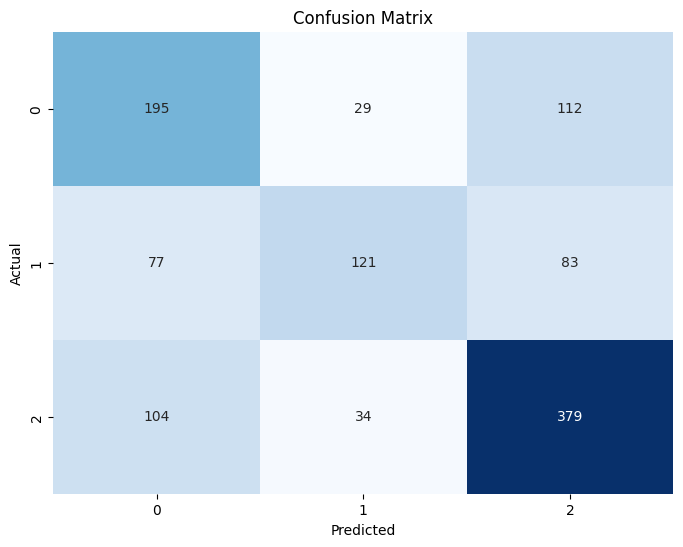

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predizendo as classes no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
